In [1]:
import alkanes
from alkanes import *

import nglview as nv
from rdkit import Chem, DataStructs, RDConfig, rdBase
from rdkit import rdBase
from rdkit.Chem import AllChem, TorsionFingerprints
from rdkit.Chem import Draw,PyMol,rdFMCS
from rdkit.Chem.Draw import IPythonConsole

/export/zimmerman/tgog/.local/lib/python3.6/site-packages/sklearn/externals/joblib/__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


importing alkanes
1
3
5
7
2
4
6
8
9
11
13
15
17
glug glug


In [2]:
def load_from_sdf(sdf_file):
    """
    """
    suppl = Chem.SDMolSupplier(sdf_file, removeHs=False) #, strictParsing=False
    sdf_mols = [mol for mol in suppl]
    return sdf_mols

In [3]:
mols = load_from_sdf('./alkanes/alkanes.sdf') 

x = [
    [-60.00000000000001, 180.0, -59.99999999999999, -59.99999999999993, -59.99999999999993, -60.0000000000001, 59.999999999999986],
    [-60.00000000000002, 180.0, 180.0, 179.99999999999997, 179.99999999999997, 180.0, -59.99999999999996],
    [59.99999999999999, 180.0, 180.0, 180.0, 180.0, 180.0, 179.99999999999997],
    [-180.0, 180.0, 180.0, -180.0, 59.99999999999999, 180.0, 180.0],
    [180.0, 180.0, -180.0, 180.0, 60.00000000000001, -59.999999999999986, -180.0],
    [180.0, 180.0, 60.00000000000001, 180.0, 180.0, 59.99999999999999, 179.99999999999997],
    [-59.99999999999999, 180.0, -180.0, 180.0, 59.99999999999996, -180.0, -180.0],
    [-60.00000000000002, 180.0, 180.0, 179.99999999999997, -180.0, 59.999999999999986, -180.0],
    [-180.0, 180.0, -180.0, 180.0, 180.0, -180.0, 180.0],
]

m = mols[-1]

m = Chem.rdmolops.AddHs(m)
AllChem.EmbedMultipleConfs(m, numConfs=10)
Chem.AllChem.MMFFOptimizeMoleculeConfs(m)
nonring, ring = TorsionFingerprints.CalculateTorsionLists(m)

for i, torsions in enumerate(x):
    conf = m.GetConformer(id=i)

    for idx, tors in enumerate(nonring):
        atoms, ang = tors
        tup = atoms[0]
        deg = Chem.rdMolTransforms.GetDihedralDeg(conf, *tup)
        Chem.rdMolTransforms.SetDihedralDeg(conf, *tup, x[i][idx])


rmslist = []
AllChem.AlignMolConformers(m, RMSlist=rmslist)

In [4]:
nv.show_rdkit(m)

NGLWidget()

In [ ]:
from matplotlib.patches import Patch
from matplotlib.lines import Line2D

legend_elements = [Line2D([0], [0], color='#bababa', lw=8, label='Memory, All Actions'),
                   Line2D([0], [0], color='#ff6e42', lw=8, label='Memoryless, All Actions'),
                   Line2D([0], [0], color='#009a87', lw=8, label='Memory, Few Actions'),
                   Line2D([0], [0], color='#ee3375', lw=8, label='Memoryless, Few Actions'),
]

# Create the figure
fig, ax = plt.subplots()
ax.legend(handles=legend_elements, loc='center', prop={'size': 16})

plt.show()

In [140]:
mols = load_from_sdf('./alkanes/alkanes.sdf') 
mols += load_from_sdf('./alkanes/pentane.sdf')
mols += load_from_sdf('./alkanes/heptane.sdf') 
mols += load_from_sdf('./alkanes/nonane.sdf') 
mols += load_from_sdf('./alkanes/11_alkane.sdf') 
mols += load_from_sdf('./alkanes/12_alkane.sdf') 
mols += load_from_sdf('./alkanes/14_alkane.sdf') 
mols += load_from_sdf('./alkanes/16_alkane.sdf') 
mols += load_from_sdf('./alkanes/18_alkane.sdf') 
mols += load_from_sdf('./alkanes/20_alkane.sdf') 

mols_by_rbn = {}

for mol in mols:
    m = Chem.rdmolops.AddHs(mol)
    AllChem.EmbedMolecule(m)
    nonring, ring = TorsionFingerprints.CalculateTorsionLists(m)
    conf = m.GetConformer(id=0)
    for tors in nonring:
        atoms, ang = tors
        tup = atoms[0]
        deg = Chem.rdMolTransforms.GetDihedralDeg(conf, *tup)
        Chem.rdMolTransforms.SetDihedralDeg(conf, *tup, 180.0)

    Chem.AllChem.MMFFOptimizeMolecule(m)

    atoms = m.GetNumAtoms()
    rbn = Chem.rdMolDescriptors.CalcNumRotatableBonds(m) - 2 
    print(rbn)
    mols_by_rbn[rbn] = m
  

1
3
5
7
2
4
6
8
9
11
13
15
17


In [141]:
confgen = ConformerGeneratorCustom(max_conformers=1, 
                 rmsd_threshold=None, 
                 force_field='mmff',
                 pool_multiplier=1)  

energy_max = {}
for num, mol in sorted(mols_by_rbn.items()):
    energy = np.exp(-1.0 * confgen.get_conformer_energies(mol)[0])
    print(num, energy)
    energy_max[num] = energy

1 160.1279753302516
2 194.75696548408018
3 238.51611413184645
4 292.8591987852375
5 359.91076597184303
6 442.49138485125803
7 544.116722375842
8 669.1430288297627
9 822.9365158123578
11 1244.775957296541
13 1882.9274492078068
15 2848.2820107736475
17 4308.517744710433


In [142]:
def get_n(rbn):
    if rbn <= 3:
        n = 25
    elif rbn == 4 or rbn == 5:
        n = 50
    elif rbn == 6 or rbn == 7:
        n = 100
    else:
        n = 200
        
    return n

In [143]:
from itertools import product
from sortedcontainers import SortedList
import time
import numpy as np

n_s = []
z_max_s = []
for num, m in sorted(mols_by_rbn.items()):

#     m = mols_by_rbn[3]
    nonring, ring = TorsionFingerprints.CalculateTorsionLists(m)
    conf = m.GetConformer(id=0)


    summ = 0
    combs = 0
    
    n = get_n(num)
    sl = SortedList()
    
    times = []
    for comb in product(*[[-1,0,1]] * num):
        ff = Chem.rdForceFieldHelpers.MMFFGetMoleculeForceField(m, Chem.rdForceFieldHelpers.MMFFGetMoleculeProperties(m))
        desired_torsions = []
        for idx, tors in enumerate(nonring):

            atoms, ang = tors
            tup = atoms[0]
            deg = Chem.rdMolTransforms.GetDihedralDeg(conf, *tup)
            Chem.rdMolTransforms.SetDihedralDeg(conf, *tup, 180.0 + 120 * comb[idx])
            tors = 180.0 + 120 * comb[idx]
            desired_torsions.append(tors)
            ff.MMFFAddTorsionConstraint(*tup, False, tors, tors,  10000.0)

        ff.Initialize()
        start = time.process_time()
        ff.Minimize()
        times.append(time.process_time() - start)

        nonring, ring = TorsionFingerprints.CalculateTorsionLists(m)
        conf = m.GetConformer(id=0)
        tups = [atoms[0] for atoms, ang in nonring]
        degs = [Chem.rdMolTransforms.GetDihedralDeg(conf, *tup) for tup in tups]

        dist = np.linalg.norm(np.sin(np.array(degs) * np.pi / 180.) - np.sin(np.array(desired_torsions) * np.pi / 180.))
        dist += np.linalg.norm(np.cos(np.array(degs)* np.pi / 180.) - np.cos(np.array(desired_torsions) * np.pi / 180.))

        if dist > 0.1:
            print('desired torsions', desired_torsions)
            print('actual torsions', degs)
            print(dist)
            energy = np.exp(-1.0 * confgen.get_conformer_energies(m)[0])
            print(energy)
        
            raise Exception
        
        energy = np.exp(-1.0 * confgen.get_conformer_energies(m)[0])
        sl.add(energy)
        if len(sl) > n:
            sl.pop(0)
        summ += energy
        combs += 1
        
    print(num, 'total is', summ)
    print('number of conformations is', combs)
    print('max is', energy_max[num])
    print('Z/max ratio is', summ / energy_max[num])
    print('top n conformers is', sum(sl))
    print('mean time', np.array(times).mean())

    
    n_s.append(num)
    z_max_s.append(summ / energy_max[num])

1 total is 298.2976919525584
number of conformations is 3
max is 160.1279753302516
Z/max ratio is 1.8628705654795326
top n conformers is 298.2976919525584
mean time 0.005072210001041337
2 total is 586.8618761962805
number of conformations is 9
max is 194.75696548408018
Z/max ratio is 3.013303656367822
top n conformers is 586.8618761962805
mean time 0.006146624777304371
3 total is 1165.96340306337
number of conformations is 27
max is 238.51611413184645
Z/max ratio is 4.888405159992046
top n conformers is 1165.963395952183
mean time 0.008530116333093718
4 total is 2335.3407079008293
number of conformations is 81
max is 292.8591987852375
Z/max ratio is 7.97427814317489
top n conformers is 2333.1421795264077
mean time 0.012622956111078599
5 total is 4691.896132512742
number of conformations is 243
max is 359.91076597184303
Z/max ratio is 13.0362761442924
top n conformers is 3572.350335700116
mean time 0.017424173502097243
6 total is 9457.892895270266
number of conformations is 729
max is 4

KeyboardInterrupt: 

In [138]:
AllChem.MMFFOptimizeMoleculeConfs(m)
energy = np.exp(-1.0 * confgen.get_conformer_energies(m)[0])
print(energy)
nv.show_rdkit(m)


27.481601383510405


NGLWidget()

In [ ]:
nonring, ring = TorsionFingerprints.CalculateTorsionLists(m)
conf = m.GetConformer(id=0)
ang = Chem.rdMolTransforms.GetDihedralDeg(conf, 3, 2, 1, 0)
print(tups, degs)
print(ang)
nv.show_rdkit(m)

In [ ]:
from rdkit.Geometry.rdGeometry import Point3D
def PointRotate3D(p1, p2, p0, theta):
    from numpy import cos, sin, sqrt

    # Translate so axis is at origin    
    p = p0 - p1
    # Initialize point q
    q = Point3D(0.0,0.0,0.0)
    N = (p2-p1)
    Nm = sqrt(N.x**2 + N.y**2 + N.z**2)
    
    # Rotation axis unit vector
    n = Point3D(N.x/Nm, N.y/Nm, N.z/Nm)

    # Matrix common factors     
    c = cos(theta)
    t = (1 - cos(theta))
    s = sin(theta)
    X = n.x
    Y = n.y
    Z = n.z

    # Matrix 'M'
    d11 = t*X**2 + c
    d12 = t*X*Y - s*Z
    d13 = t*X*Z + s*Y
    d21 = t*X*Y + s*Z
    d22 = t*Y**2 + c
    d23 = t*Y*Z - s*X
    d31 = t*X*Z - s*Y
    d32 = t*Y*Z + s*X
    d33 = t*Z**2 + c

    #            |p.x|
    # Matrix 'M'*|p.y|
    #            |p.z|
    q.x = d11*p.x + d12*p.y + d13*p.z
    q.y = d21*p.x + d22*p.y + d23*p.z
    q.z = d31*p.x + d32*p.y + d33*p.z

    # Translate axis and rotated point back to original location    
    return q + p1

In [ ]:
def setRingDihedralDeg(conf, iAtomId, jAtomId, kAtomId, lAtomId, value):
    rIJ = conf.GetAtomPosition(jAtomId) - conf.GetAtomPosition(iAtomId);
    rIJSqLength = rIJ.LengthSq();
    if (rIJSqLength <= 1.e-16):
        raise Exception("atoms i and j have identical 3D coordinates");

    rJK = conf.GetAtomPosition(kAtomId) - conf.GetAtomPosition(jAtomId);
    rJKSqLength = rJK.LengthSq();

    if (rJKSqLength <= 1.e-16):
        raise ValueErrorException("atoms j and k have identical 3D coordinates");

    rKL = conf.GetAtomPosition(lAtomId) - conf.GetAtomPosition(kAtomId);
    rKLSqLength = rKL.LengthSq()
    if (rKLSqLength <= 1.e-16):
        raise ValueErrorException("atoms k and l have identical 3D coordinates");

    nIJK = rIJ.CrossProduct(rJK);
    nIJKSqLength = nIJK.LengthSq();
    nJKL = rJK.CrossProduct(rKL);
    nJKLSqLength = nJKL.LengthSq();
    m1 = nIJK.CrossProduct(rJK);
    # we only need to rotate by delta with respect to the current dihedral value
    value *= (np.pi / 180)
    value -= -np.arctan2(m1.DotProduct(nJKL) / np.sqrt(nJKLSqLength * m1.LengthSq()),
                  nIJK.DotProduct(nJKL) / np.sqrt(nIJKSqLength * nJKLSqLength));
    # our rotation axis is the (j,k) bond
    rotAxisBegin = conf.GetAtomPosition(jAtomId);
    rotAxisEnd = conf.GetAtomPosition(kAtomId);
    rotAxis = rotAxisEnd - rotAxisBegin
    rotAxis.Normalize()
    # get all atoms bonded to k and loop through them
    # std::list<unsigned int> alist;
    # _toBeMovedIdxList(mol, jAtomId, kAtomId, alist);
    # for (unsigned int &it : alist) {
    # translate atom so that it coincides with the origin of rotation
    pos = conf.GetAtomPosition(lAtomId)

    # rotate around our rotation axis
    p = PointRotate3D(rotAxisBegin, rotAxisEnd, pos, value)
    conf.SetAtomPosition(lAtomId, p)

In [63]:
def print_dihedrals(conf):
    m = conf.GetOwningMol()
    nonring, ring = TorsionFingerprints.CalculateTorsionLists(m)
    print('nonring')
    for idx, tors in enumerate(nonring):
        atoms, ang = tors
        tup = atoms[0]
        deg = Chem.rdMolTransforms.GetDihedralDeg(conf, *tup)
        print(tup, deg)

#     print('ring')        
#     for tors in ring:
#         deg = Chem.rdMolTransforms.GetDihedralDeg(conf, *tors)
#         print(tors, deg)
#     print('\n\n\n')

In [ ]:
def add_torsion_constraints(ff, tors_list, rotate=0, minimize=False):
    tors_list = tors_list[rotate:] + tors_list[:rotate]
    
    tors = tors_list[0]
    ff.MMFFAddTorsionConstraint(0, 5, 4, 3, False, tors - 0.1, tors + 0.1, 10000.0)
    tors = tors_list[1]
    ff.MMFFAddTorsionConstraint(5, 4, 3, 2, False, tors - 0.1, tors + 0.1, 10000.0)
    tors = tors_list[2]
    ff.MMFFAddTorsionConstraint(4, 3, 2, 1, False, tors - 0.1, tors + 0.1,  10000.0)
    tors = tors_list[3]
    ff.MMFFAddTorsionConstraint(3, 2, 1, 0, False, tors - 0.1, tors + 0.1,  10000.0)
    tors = tors_list[4]
    ff.MMFFAddTorsionConstraint(2, 1, 0, 5, False, tors - 0.1, tors + 0.1,  10000.0)
    tors = tors_list[5]
    ff.MMFFAddTorsionConstraint(1, 0, 5, 4, False, tors - 0.1, tors + 0.1,  10000.0)


In [305]:
def get_radial_hist(series, N, title='decane φ histogram'):
    bottom = 2

    # create theta for 24 hours
    theta = np.linspace(0.0, 2 * np.pi, N, endpoint=False)

    # make the histogram that bined on 24 hour
    radii, tick = np.histogram(torsions, bins = N)

    # width of each bin on the plot
    width = (2*np.pi) / N

    # make a polar plot
    plt.figure(figsize = (12, 8))
    ax = plt.subplot(111, polar=True)
    bars = ax.bar(theta, radii, width=width, bottom=bottom)

    # set the lable go clockwise and start from the top
    ax.set_theta_zero_location("N")
    # clockwise
    ax.set_theta_direction(-1)

    # set the label
    ticks = ['180/-180', '-135', '-90', '-45', '0', '45', '90', '135']
    ax.set_xticklabels(ticks)
    plt.title(title)
    plt.show()

In [ ]:
m = Chem.MolFromSmiles('C1CCCCC1')
m = Chem.AddHs(m)
AllChem.EmbedMultipleConfs(m, numConfs=1)
res = AllChem.MMFFOptimizeMoleculeConfs(m)
nonring, ring = TorsionFingerprints.CalculateTorsionLists(m)
ring = ring[0][0]

print_dihedrals(conf)
    
w = nv.show_rdkit(m)
w.add_label(labelType="atomindex", color='blue')
w

In [ ]:
ff = rdkit.Chem.rdForceFieldHelpers.MMFFGetMoleculeForceField(m, rdkit.Chem.rdForceFieldHelpers.MMFFGetMoleculeProperties(m))

# ff.MMFFAddTorsionConstraint(0, 5, 4, 3, False, 180.0, 180.0, 10000.0)
# ff.MMFFAddTorsionConstraint(5, 4, 3, 2, False, 180.0, 180.0, 10000.0)
# ff.MMFFAddTorsionConstraint(4, 3, 2, 1, False, 180.0, 180.0,  10000.0)
# ff.MMFFAddTorsionConstraint(3, 2, 1, 0, False, 180.0, 180.0,  10000.0)
# ff.MMFFAddTorsionConstraint(2, 1, 0, 5, False, 180.0, 180.0,  10000.0)
# ff.MMFFAddTorsionConstraint(1, 0, 5, 4, False, 180.0, 180.0,  10000.0)

# ff.MMFFAddTorsionConstraint(0, 5, 4, 3, False, -29.2, -29.0, 10000.0)
# ff.MMFFAddTorsionConstraint(5, 4, 3, 2, False, 60.0, 60.2, 10000.0)
# ff.MMFFAddTorsionConstraint(4, 3, 2, 1, False, -29.2, -29.0, 10000.0)
# ff.MMFFAddTorsionConstraint(3, 2, 1, 0, False, -29.2, -29.0, 10000.0)
# ff.MMFFAddTorsionConstraint(2, 1, 0, 5, False, 60.0, 60.2, 10000.0)
# ff.MMFFAddTorsionConstraint(1, 0, 5, 4, False, -29.2, -29.0, 10000.0)

add_torsion_constraints(ff, [-29.1675, 60.106, -29.1675, -29.1675, 60.106, -29.1675], rotate=1)


# add_torsion_constraints(ff, [-54.2, 54.2, -54.2, 54.2, -54.2, 54.2])


# add_torsion_constraints(ff, [-46, -26,  -5,  25, -13, 65])

ff.Initialize()
ret = ff.Minimize(maxIts=500)
print(ret)

# AllChem.MMFFOptimizeMolecule(m)


In [ ]:
AllChem.MMFFOptimizeMoleculeConfs(m)
print_dihedrals(m.GetConformers()[0])
w = nv.show_rdkit(m)
w.add_label(labelType="atomindex", color='blue')
w

In [ ]:
import numpy as np
k = np.random.randint(-80, 80, size=(1,5))
print(k)
print(0 - k.sum())
help(np.random.randint)

In [56]:
lignin = Chem.MolFromMolFile('lignin_guaiacyl.mol')
lignin = Chem.AddHs(lignin)
AllChem.EmbedMultipleConfs(lignin, numConfs=100, numThreads=0)


In [6]:
w = nv.show_rdkit(lignin)
w.add_label(labelType="atomindex", color='blue')
w

NGLWidget()

In [41]:
nonring, ring = TorsionFingerprints.CalculateTorsionLists(lignin)
print(nonring)
print(ring)

[([(2, 1, 4, 5)], 180.0), ([(4, 1, 2, 14)], 180.0), ([(4, 1, 0, 3)], 180.0), ([(6, 5, 4, 1)], 180.0), ([(5, 6, 11, 12)], 180.0), ([(15, 14, 2, 1)], 180.0), ([(22, 20, 18, 19)], 180.0), ([(23, 21, 19, 18)], 180.0)]
[([(6, 8, 10, 9), (8, 10, 9, 7), (10, 9, 7, 5), (9, 7, 5, 6), (7, 5, 6, 8), (5, 6, 8, 10)], 36.34137323903797), ([(15, 17, 19, 18), (17, 19, 18, 16), (19, 18, 16, 14), (18, 16, 14, 15), (16, 14, 15, 17), (14, 15, 17, 19)], 36.34137323903797)]


In [73]:
AllChem.MMFFOptimizeMoleculeConfs(lignin, numThreads=0)
energys = confgen.get_conformer_energies(lignin)

energys = energys - energys.min()

for idx, x in enumerate(np.argsort(np.exp(-1 * energys))):
    print(idx, x, energys[x])


0 61 15.678602720340649
1 73 14.959817083831439
2 43 14.486339441007885
3 94 11.759163786846756
4 8 11.75914972258093
5 46 10.832201485299308
6 75 9.634986346698554
7 18 9.254831424466204
8 68 9.246845358997803
9 21 9.077778018444505
10 5 8.3584115770378
11 47 7.573770268861253
12 44 7.184979399749523
13 32 7.1849592472910615
14 31 7.028079899902053
15 45 6.903525748857874
16 63 6.896023123105465
17 99 6.8959995039064665
18 41 6.627450785755386
19 93 6.551333402629908
20 49 6.50886702017371
21 20 6.506122385618781
22 85 6.336901996506342
23 7 6.193961306908463
24 95 6.000744555839006
25 62 5.925455715485214
26 29 5.910316053024502
27 82 5.910311140691661
28 39 5.851428268064097
29 0 5.753209295853708
30 55 5.650823565325339
31 80 5.6507045776808695
32 83 5.42643641041046
33 10 5.423806495279777
34 6 5.420940131292156
35 40 5.408660766359787
36 96 5.264802297527979
37 33 5.264800317938182
38 48 5.264795060378731
39 16 5.26479368368507
40 57 5.264762889323819
41 90 4.986940630413699
42 3

In [78]:
print_dihedrals(lignin.GetConformer(id=65))

nonring
(2, 1, 4, 5) 131.33556003401475
(4, 1, 2, 14) -172.93090998394737
(4, 1, 0, 3) -60.118954214692934
(6, 5, 4, 1) -66.27497358987364
(5, 6, 11, 12) -175.78672841987728
(15, 14, 2, 1) -106.10916015650555
(22, 20, 18, 19) 34.33475476090145
(23, 21, 19, 18) 172.5437476078905


In [58]:
out = np.array(AllChem.GetConformerRMSMatrix(lignin))
np.argmin(out)
out[2965]

3.479420693456205

In [10]:
x = get_conformer_rmsd_fast(lignin)



Calculating RMSDs of conformer 99: 100%|██████████| 100/100 [00:01<00:00, 84.77it/s]


In [210]:
np.sum(x>4.05)

2

In [211]:
np.nonzero(x>4.05)


(array([33, 82]), array([82, 33]))

In [296]:
#39,77 and 45,86 are very similar

print_dihedrals(lignin.GetConformer(33))
print_dihedrals(lignin.GetConformer(82))

nonring
(0, 1, 2, 3) 6.6596299412528985
(1, 2, 3, 4) -38.22045642196896
(2, 3, 4, 5) 125.66460396237463
(3, 4, 5, 6) 50.901712726735
(4, 5, 6, 7) 176.1519685057432
(5, 6, 7, 8) 178.11843385661172
(6, 7, 8, 9) -179.9652508211595
(7, 8, 9, 10) 179.74501434145216
(8, 9, 10, 11) -0.27491514680127865
nonring
(0, 1, 2, 3) 2.348418243440511
(1, 2, 3, 4) -40.00360171591846
(2, 3, 4, 5) 134.7951135495794
(3, 4, 5, 6) 58.96425906944115
(4, 5, 6, 7) 175.34495611343283
(5, 6, 7, 8) 178.06617206969267
(6, 7, 8, 9) 179.9676197643982
(7, 8, 9, 10) 179.6992900469096
(8, 9, 10, 11) -0.432333595146146


In [294]:
import py3Dmol
def drawit(m, p, confId=-1):
    mb = Chem.MolToMolBlock(m, confId=confId)
    p.removeAllModels()
    p.addModel(mb, "sdf")
    p.setStyle({"stick":{}})
    p.setBackgroundColor("0xeeeeee")
    p.zoomTo()
    return p.show()

p = py3Dmol.view(width=800,height=800)
drawit(lignin, p, confId=46)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [ ]:
AllChem.MMFFOptimizeMoleculeConfs(lignin)


In [55]:
print_dihedrals(lignin.GetConformer(4))

nonring
(0, 1, 4, 5) -115.28158091099536
(4, 1, 2, 13) 175.10507693683215
(4, 1, 0, 3) -68.31483579084289
(6, 5, 4, 1) -171.7679652942236
(5, 6, 11, 12) 179.49615977710394
(16, 14, 2, 13) 63.387069165431285
(22, 20, 18, 19) 178.60280237957178
(23, 21, 19, 17) 0.23295338798470847


In [56]:
def bag_of_dihedrals(mol):
    import pandas as pd
    nonring, ring = TorsionFingerprints.CalculateTorsionLists(mol)
    torsions = []
    for conf in mol.GetConformers():
        for idx, tors in enumerate(nonring):
            atoms, ang = tors
            tup = atoms[0]
            deg = Chem.rdMolTransforms.GetDihedralDeg(conf, *tup)
            torsions.append(deg)
            
    return pd.Series(torsions)


In [117]:

torsions = bag_of_dihedrals(lignin)

torsions /= (180)


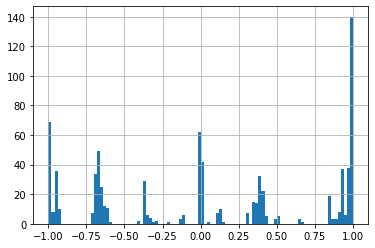

In [118]:
torsions.hist(bins=100)

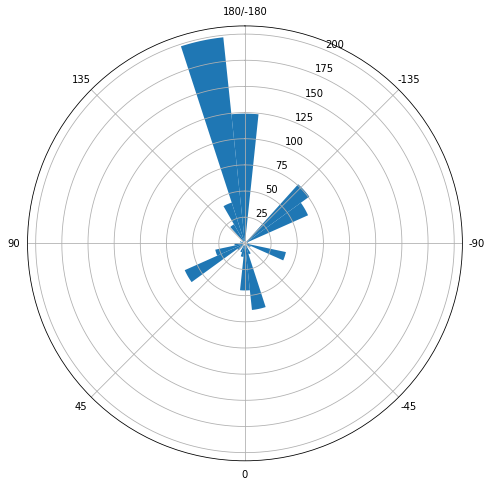

In [120]:
get_radial_hist(torsions * np.pi, 30)

In [83]:
np.array([-1.0, -0.66, -.33, 0, .33, .66, 1]) * 180

array([-180. , -118.8,  -59.4,    0. ,   59.4,  118.8,  180. ])

In [301]:
m = Chem.MolFromSmiles('CCCCCCCCCCCC')
m = Chem.AddHs(m)
AllChem.EmbedMultipleConfs(m, numConfs=400, numThreads=0)
res = AllChem.MMFFOptimizeMoleculeConfs(m, numThreads=0)
nonring, ring = TorsionFingerprints.CalculateTorsionLists(m)
    
w = nv.show_rdkit(m)
w.add_label(labelType="atomindex", color='blue')
w

NGLWidget()

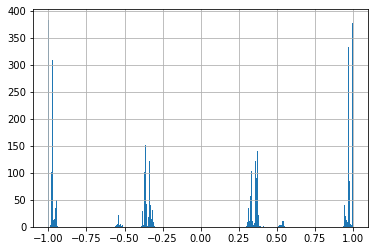

In [302]:
torsions = bag_of_dihedrals(m)
torsions /= (180)
torsions.hist(bins=400)

In [303]:
torsions *= 2*np.pi

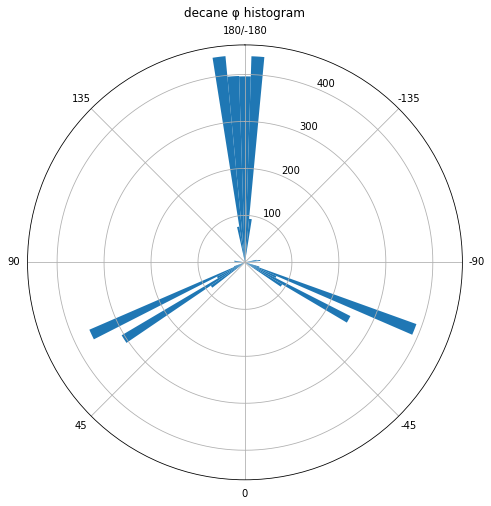

In [306]:
get_radial_hist(torsions, 100)

In [229]:
torsions

0    -6.277789
1    -6.118320
2    -2.304177
3    -6.118787
4    -6.277370
5    -6.281837
6    -6.278311
7    -6.131964
8    -2.291107
9    -2.291598
10   -6.132715
11    6.282305
12    6.110878
13    2.352200
14   -6.271489
15   -2.110899
16   -2.062938
17   -6.111348
dtype: float64

In [230]:
conf = m.GetConformer(0)
print_dihedrals(conf)

nonring
(0, 1, 2, 3) -179.84539870751848
(1, 2, 3, 4) -175.27696985984258
(2, 3, 4, 5) -66.00980518637824
(3, 4, 5, 6) -175.29033538933032
(4, 5, 6, 7) -179.8333903303334
(5, 6, 7, 8) -179.96138013540428
(6, 7, 8, 9) -179.86036008612078
(7, 8, 9, 10) -175.66782652516318
(8, 9, 10, 11) -65.63537660043566


In [270]:
nonring, ring = TorsionFingerprints.CalculateTorsionLists(m)


x = [
    -180,
    -180,
    -180,
    -180,
    -180,
    -180,
    -180,
    -180,
    -180,
]

y = [
    -180,
    -180,
    -180,
    -180,
    -180,
    -180,
    -180,
    -180,
    -180,
]

conf = m.GetConformer(id=0)

for idx, tors in enumerate(nonring):
    atoms, ang = tors
    tup = atoms[0]
    deg = Chem.rdMolTransforms.GetDihedralDeg(conf, *tup)
    Chem.rdMolTransforms.SetDihedralDeg(conf, *tup, x[idx])

conf = m.GetConformer(id=1)

for idx, tors in enumerate(nonring):
    atoms, ang = tors
    tup = atoms[0]
    deg = Chem.rdMolTransforms.GetDihedralDeg(conf, *tup)
    Chem.rdMolTransforms.SetDihedralDeg(conf, *tup, y[idx])
    
    


In [271]:
m.GetConformers()

(<rdkit.Chem.rdchem.Conformer at 0x7f8ed4ed3240>,
 <rdkit.Chem.rdchem.Conformer at 0x7f8ed4ed3818>)

In [272]:
confgen.get_conformer_energies(m)

array([-6.02906893, -5.03576563])

In [273]:
AllChem.GetConformerRMS(m, 0, 1)

1.1724221596635498

In [274]:
Chem.TorsionFingerprints.GetTFDBetweenConformers(m, [0], [1])

[3.8478321840029904e-10]

In [298]:
p = py3Dmol.view(width=800,height=800)
drawit(m, p, confId=0)

You appear to be running in JupyterLab (or JavaScript failed to load for some other reason). You need to install the 3dmol extension: 
 jupyter labextension install jupyterlab_3dmol

In [300]:
AllChem.MMFFOptimizeMoleculeConfs(m)
print(confgen.get_conformer_energies(m))
print(AllChem.GetConformerRMS(m, 0, 1))
print(Chem.TorsionFingerprints.GetTFDBetweenConformers(m, [0], [1]))

[-6.71287903 -6.71287902]
1.1794663504444367
[1.4362777388374274e-06]


In [12]:
conf = lignin.GetConformer(id=-1)

In [18]:
torch.Tensor(conf.GetPositions())

torch.Size([46, 3])

In [16]:
import torch

In [21]:
atom = lignin.GetAtomWithIdx(0)

In [22]:
atom.GetIdx()

0

In [55]:
conf.GetOwningMol()

46

In [28]:
nonring, ring = TorsionFingerprints.CalculateTorsionLists(lignin)
print(nonring)
print('\n')
print(ring)

[([(2, 1, 4, 5)], 180.0), ([(4, 1, 2, 14)], 180.0), ([(4, 1, 0, 3)], 180.0), ([(6, 5, 4, 1)], 180.0), ([(5, 6, 11, 12)], 180.0), ([(15, 14, 2, 1)], 180.0), ([(22, 20, 18, 19)], 180.0), ([(23, 21, 19, 18)], 180.0)]


[([(6, 8, 10, 9), (8, 10, 9, 7), (10, 9, 7, 5), (9, 7, 5, 6), (7, 5, 6, 8), (5, 6, 8, 10)], 36.34137323903797), ([(15, 17, 19, 18), (17, 19, 18, 16), (19, 18, 16, 14), (18, 16, 14, 15), (16, 14, 15, 17), (14, 15, 17, 19)], 36.34137323903797)]


In [37]:
def bond_features(bond, use_chirality=False):
    from rdkit import Chem
    bt = bond.GetBondType()
    bond_feats = [
        bt == Chem.rdchem.BondType.SINGLE, bt == Chem.rdchem.BondType.DOUBLE,
        bt == Chem.rdchem.BondType.TRIPLE, bt == Chem.rdchem.BondType.AROMATIC,
        bond.GetIsConjugated(),
        bond.IsInRing()
    ]
    if use_chirality:
        bond_feats = bond_feats + one_of_k_encoding_unk(
            str(bond.GetStereo()),
            ["STEREONONE", "STEREOANY", "STEREOZ", "STEREOE"])
    return np.array(bond_feats)
 
#################
# pen added
#################
def get_bond_pair(mol):
    bonds = mol.GetBonds()
    res = [[],[]]
    for bond in bonds:
        res[0] += [bond.GetBeginAtomIdx(), bond.GetEndAtomIdx()]
        res[1] += [bond.GetEndAtomIdx(), bond.GetBeginAtomIdx()]
    return res

def atom_features_simple(atom, conf):
    p = conf.GetAtomPosition(atom.GetIdx())
    return np.array([p.x, p.y, p.z])


def mol2vecsimple(mol):
    conf = mol.GetConformer(id=-1)
    atoms = mol.GetAtoms()
    bonds = mol.GetBonds()
    node_f= [atom_features_simple(atom, conf) for atom in atoms]
    edge_index = get_bond_pair(mol)
    edge_attr = [bond_features(bond, use_chirality=False) for bond in bonds]
    for bond in bonds:
        edge_attr.append(bond_features(bond))
    data = Data(
                x=torch.tensor(node_f, dtype=torch.float),
                edge_index=torch.tensor(edge_index, dtype=torch.long),
                edge_attr=torch.tensor(edge_attr,dtype=torch.float),
                pos=torch.Tensor(conf.GetPositions())
            )
    data = Distance()(data)
    return data    



[([(0, 1, 2, 3)], 180.0), ([(1, 2, 3, 4)], 180.0), ([(2, 3, 4, 5)], 180.0)] 
 []


NGLWidget()